<b> 1. Data Processing: Data Cleaning </b><br>
This includes handling missing values, outliers, and inconsistent data.

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('data.csv')

# Handling missing values
df.fillna(df.mean(), inplace=True)  # Fill numeric columns with mean
df['Category'] = df['Category'].fillna('Unknown')  # Fill categorical with a placeholder

# Removing duplicates
df.drop_duplicates(inplace=True)

# Handling outliers (example using Z-score method)
from scipy.stats import zscore
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Normalizing numeric data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Feature1', 'Feature2']] = scaler.fit_transform(df[['Feature1', 'Feature2']])

print(df.head())


<b> 2.Deep Learning: Neural Network Example</b></br>
Here's how to preprocess CIFAR-10 images (flip, convert to grayscale, and train a model to reverse the effects):

Code Explanation:
Flip Images: Horizontally flip images randomly.
Convert to Grayscale: Change colored images to grayscale.
Train to Reverse Effects: Use a deep learning model to learn reversing (restore to original).

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, InputLayer
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, _), (X_test, _) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to [0, 1]

# Preprocess: Flip and Grayscale
def preprocess_images(images):
    # Random horizontal flip
    flipped_images = tf.image.random_flip_left_right(images)
    # Convert to grayscale
    grayscale_images = tf.image.rgb_to_grayscale(flipped_images)
    return grayscale_images, images  # Grayscale as input, original as target

X_train_gray, X_train_orig = preprocess_images(X_train)
X_test_gray, X_test_orig = preprocess_images(X_test)

# Build the model (autoencoder)
model = Sequential([
    InputLayer(input_shape=(32, 32, 1)),  # Input: grayscale (32x32x1)
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output: RGB (32x32x3)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
model.fit(X_train_gray, X_train_orig, epochs=10, batch_size=64, validation_data=(X_test_gray, X_test_orig))

# Test on images
predictions = model.predict(X_test_gray)

# Display original, grayscale, and restored images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test_orig[i])  # Original
    plt.axis('off')
    plt.title("Original")
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(X_test_gray[i].squeeze(), cmap='gray')  # Grayscale
    plt.axis('off')
    plt.title("Grayscale")
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(predictions[i])  # Restored
    plt.axis('off')
    plt.title("Restored")
plt.show()


How to detect and remove anomalies from data loaded from an Excel or CSV file:

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Load data from Excel or CSV
file_path = 'your_file.csv'  # Replace with your file path
df = pd.read_csv(file_path)  # Use pd.read_excel() for Excel files

# Example: Display the first few rows
print("Original Data:")
print(df.head())

# Detect and remove anomalies using Z-Score
# Replace 'ColumnName' with the column to check for anomalies
column_name = 'ColumnName'  # Change to your target column
z_scores = zscore(df[column_name])

# Define threshold (e.g., Z-score > 3 is considered an anomaly)
threshold = 3
df_cleaned = df[(abs(z_scores) < threshold)]

# Save cleaned data to a new file
output_file = 'cleaned_data.csv'
df_cleaned.to_csv(output_file, index=False)

# Display cleaned data
print("\nCleaned Data:")
print(df_cleaned.head())

print(f"\nCleaned data exported to {output_file}")


Extending for Multiple Columns
If you want to check for anomalies across multiple columns:

In [ ]:
columns_to_check = ['Column1', 'Column2']  # Specify columns
z_scores = df[columns_to_check].apply(zscore)

# Filter rows without anomalies in any of the specified columns
df_cleaned = df[(z_scores.abs() < threshold).all(axis=1)]


 Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Example Dataset
Load a sample dataset:

In [ ]:
# Example: Load data from CSV
file_path = 'your_file.csv'  # Replace with your file path
df = pd.read_csv(file_path)
print(df.head())


Heatmap<br>
Visualize correlations or matrix data

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()


Histogram<br>
Shows the distribution of a single column.

In [ ]:
# Replace 'ColumnName' with the actual column
plt.figure(figsize=(8, 6))
plt.hist(df['ColumnName'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('ColumnName')
plt.ylabel('Frequency')
plt.show()


Bar Graph <br>
Compare categories in a column.

In [ ]:
# Replace 'CategoryColumn' with the column containing categories
category_counts = df['CategoryColumn'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='orange')
plt.title('Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


Line Graph<br>
Visualize trends over time.

In [ ]:
# Replace 'TimeColumn' and 'ValueColumn' with actual columns
plt.figure(figsize=(10, 6))
plt.plot(df['TimeColumn'], df['ValueColumn'], marker='o', color='green')
plt.title('Line Graph')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid()
plt.show()


Scatter Plot <br>
Show relationships between two numerical variables.

In [ ]:
# Replace 'ColumnX' and 'ColumnY' with actual column names
plt.figure(figsize=(8, 6))
plt.scatter(df['ColumnX'], df['ColumnY'], color='purple')
plt.title('Scatter Plot')
plt.xlabel('ColumnX')
plt.ylabel('ColumnY')
plt.show()


Box Plot<br>
Detect outliers and understand the distribution

In [ ]:
# Replace 'ColumnName' with the actual column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ColumnName'], color='lightblue')
plt.title('Box Plot')
plt.ylabel('ColumnName')
plt.show()


Pair Plot<br>
Visualize relationships between multiple numerical columns

In [ ]:
# Specify columns or use the whole DataFrame
sns.pairplot(df[['Column1', 'Column2', 'Column3']])
plt.show()


Natural Language Processing (NLP) <br>
Example of text preprocessing and sentiment analysis.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text data
texts = ["I love data science!", "Machine learning is amazing.", "Deep learning is challenging but rewarding."]
labels = [1, 1, 0]  # 1=Positive, 0=Negative

# Preprocessing
stop_words = set(stopwords.words('english'))
texts_processed = [' '.join([word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]) for text in texts]

# Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts_processed).toarray()

# Train a simple model
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
print(f"Accuracy: {model.score(X_test, y_test)}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Phase 1: Data Collection (e.g., UGRansome dataset)
df2 = pd.read_csv(r'C:/Users/u21629545/Downloads/archive (8)/final(2).csv')
df2
df2.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress','Threats','Port','Prediction']
df2


# Data cleaning
# Renaming the attack "Bonet" to "Botnet"
df2['Threats'] = df2['Threats'].str.replace('Bonet', 'Botnet')
# Print the modified DataFrame
df2
# Phase 2: Data Preparation (feature engineering and data transformation)
# --- Drop all duplicate rows --- #
df2 = df2.drop_duplicates()
# --- Remove negative values from time/timestamp feature --- #
df2['Time'] = df2['Time'] + 11
# --- Math transformations to reduce skewness --- #
# --- Log transformation applied to column NETFLOW_BYTES --- #
# A log transformation involves taking the natural logarithm (base e) of each data point in a particular column or feature.
#Logarithmic transformations are often used to reduce the impact of extreme values (outliers) and make the data conform more 
#closely to a normal distribution. They are particularly useful when dealing with positively skewed data, 
#where the tail of the distribution is elongated on the right side.

#The np.log() function is a common way to perform a logarithmic transformation in Python. 
#The + 1 added to the data points is often used to avoid issues with taking the logarithm of zero or negative values. 
#It's a common practice to add a small constant like 1 to the data before applying the logarithm.
#By applying a log transformation to a feature, you're essentially compressing the range of values in that feature, 
#which can help in cases where the data exhibits a rightward skew, making it more suitable for certain types of analysis 
#or modeling techniques that assume normally distributed data.
df2['Netflow_Bytes'] = np.log(df2['Netflow_Bytes']+1)

# --- Square root transformation applied to columns USD ---#

#Square Root Transformation: A square root transformation involves taking the square root of each data point in the 
#specified column. In this case, it's applied to the 'USD' column.
#Square root transformations are a type of mathematical transformation used to mitigate the impact of right-skewed data. 
#Just like logarithmic transformations, square root transformations can help make the data more symmetric and closer to 
#a normal distribution.
#The np.sqrt() function is used to calculate the square root.
#By applying a square root transformation to the 'USD' column, the code is attempting to make the data distribution less skewed 
#and more suitable for certain statistical analyses or modeling techniques that assume normally distributed data or 
#require data to be more symmetric. It's a common technique used in data preprocessing to improve the quality of data for 
#analysis or modeling
df2['USD'] = np.sqrt(df2['USD'])
# --- Yeo Johnson transformation applied to columns BTC--#

#Yeo-Johnson transformation is being applied to the 'BTC' column in the DataFrame (df2['BTC']). 
#This transformation is used to modify the data in the 'BTC' column to make its distribution more normalized or symmetric
#The Yeo-Johnson transformation is a mathematical transformation technique used to modify the distribution of data. 
#It can be applied to both positive and negative values and is more versatile than some other transformations like the Box-Cox transformation.
#The transformation is performed using the stats.yeojohnson() function from a library like SciPy

df2['BTC'], _ = stats.yeojohnson(df2['BTC'])

#--PLOTING TRANSFORMED DATA--#
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the transformed 'USD' column
ax.hist(df2['USD'], bins=50, alpha=0.5, color='blue', label='USD (Square Root)')
# Plot the transformed 'BTC' column
ax.hist(df2['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')
# Plot the transformed 'Netflow_Bytes' column
ax.hist(df2['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')
# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()
# Show the plot
plt.show()


# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Create a StandardScaler instance
# The StandardScaler is a common preprocessing technique used in machine learning and data analysis. 
#It is used to standardize or normalize the features of a dataset by scaling them such that they have a mean of 0 and a standard
#deviation of 1.

#Standardizing the features is useful because it makes different features more directly comparable, especially in algorithms 
#that are sensitive to the scale of the input data, such as many machine learning algorithms.
#In the code provided, scaler is created as an instance of the StandardScaler class, which can then be used to standardize 
#the specified columns in the df2 DataFrame using the fit_transform method, as seen in the subsequent code
scaler = StandardScaler()
# Normalize each column's features
df2_normalized = df2.copy()
df2_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df2[['USD', 'BTC', 'Netflow_Bytes']])
# Plot the density of the normalized 'USD' column
sns.kdeplot(df2_normalized['USD'], color='blue', label='USD (Square Root)', ax=ax)
# Plot the density of the normalized 'BTC' column
sns.kdeplot(df2_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)
# Plot the density of the normalized 'Netflow_Bytes' column
sns.kdeplot(df2_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)
# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()
# Show the plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# df2 is your dataframe
plt.figure(figsize=(17, 6))
corr = df2.corr(method='spearman')
my_m = np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#The preprocessing module in scikit-learn provides various tools and techniques for preprocessing your data before 
#feeding it into machine learning models. 
#This preprocessing is crucial to improve the quality of your data and the performance of your models.
from sklearn import preprocessing #pip install scikit-learn
#The code segment uses scikit-learn's LabelEncoder to transform categorical variables into numerical values. 
#Each categorical column, such as 'Protocol,' 'Flag,' 'Family,' 'SeedAddress,' 'ExpAddress,' 'IPaddress,' 'Threats,' and 
#'Prediction,' is encoded into unique numeric labels. 
#This preprocessing step is essential for machine learning algorithms, as they typically require numerical input data 
#instead of categorical labels.

lab_encoder = preprocessing.LabelEncoder()                     # transformation of categorical to numeric
df2['Protocol'] = lab_encoder.fit_transform(df2['Protocol'])
df2['Flag'] = lab_encoder.fit_transform(df2['Flag'])
df2['Family'] = lab_encoder.fit_transform(df2['Family'])
df2['SeedAddress'] = lab_encoder.fit_transform(df2['SeedAddress'])
df2['ExpAddress'] = lab_encoder.fit_transform(df2['ExpAddress'])
df2['IPaddress'] = lab_encoder.fit_transform(df2['IPaddress'])
df2['Threats'] = lab_encoder.fit_transform(df2['Threats'])
df2['Prediction'] = lab_encoder.fit_transform(df2['Prediction'])
df2



1. Introduction to ethics in data science <br>
Definition of Ethics: Overview of ethical principles and their importance in decision-making. <br>
Privacy: Protecting individuals' personal data from unauthorized access or misuse. <br>
Bias and Fairness: Ensuring data and algorithms do not disproportionately disadvantage any group. <br>
Transparency: Being clear about how data is collected, processed, and how decisions are made by algorithms. <br>
Accountability: Taking responsibility for the impact of data-driven decisions and ensuring that harm is minimized. <br>
Security: Safeguarding data from breaches and ensuring the confidentiality and integrity of information. <br>
Ethics in Data Science refers to the application of moral principles and values to the processes and practices involved in collecting, analyzing, and using data. It ensures that data science activities are conducted in a way that respects individual rights, promotes fairness, maintains transparency, and avoids harm. Key ethical considerations include:<br>
Ethics in data science aims to balance innovation and societal good with legal and moral responsibilities, preventing misuse of data and ensuring trust in data-driven technologies.<br>
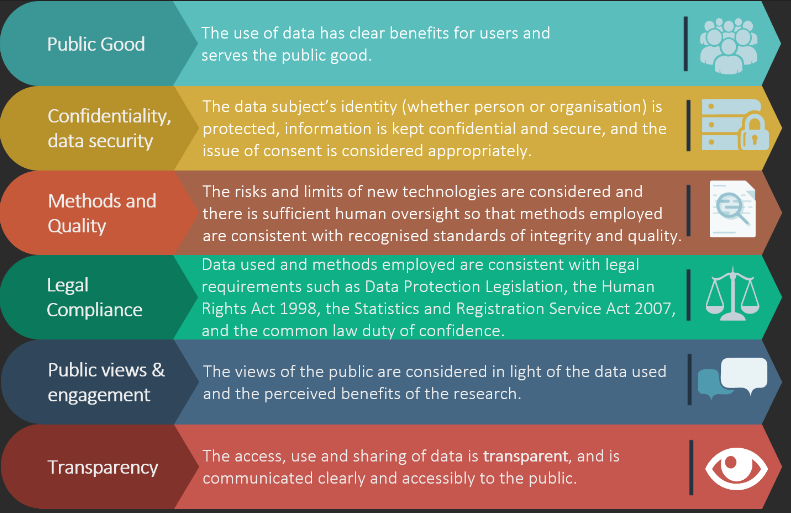<br>

Relevance to Data Science: Discuss why ethics is critical in data-driven practices, particularly due to the influence of data science on society (e.g., AI, automation).<br>
Examples of Ethical Issues: Misuse of personal data, biased algorithms, and lack of transparency.<br>

2. Key ethical principles in data science <br>
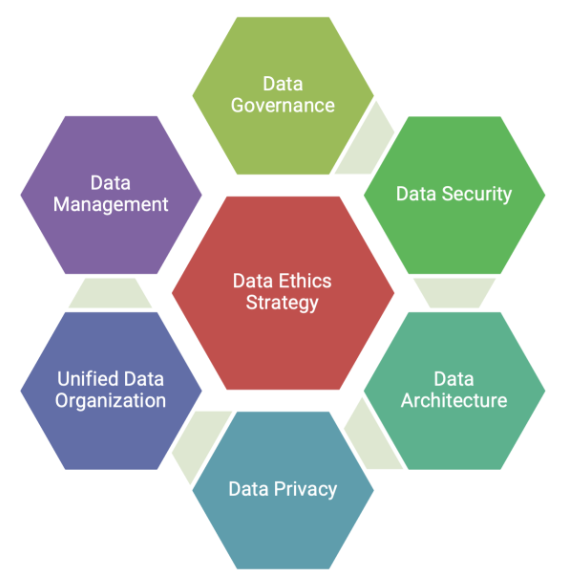 <br>
Fairness: Ensuring that data models and algorithms treat all individuals or groups fairly without bias (e.g., gender, race, socio-economic status).<br>
Transparency: Data scientists must provide transparency in their methods, data sources, and algorithms.<br>
Accountability: Who is responsible when a data model causes harm? The need for accountability mechanisms for decisions made by AI or ML models.<br>
Privacy: Understanding privacy laws and ensuring that personal data is collected, processed, and stored with proper consent and security measures.<br>
Security: Ethical responsibilities in protecting data from breaches and ensuring the confidentiality, integrity, and availability of data.<br>

3. Bias in data collection and modeling<br>
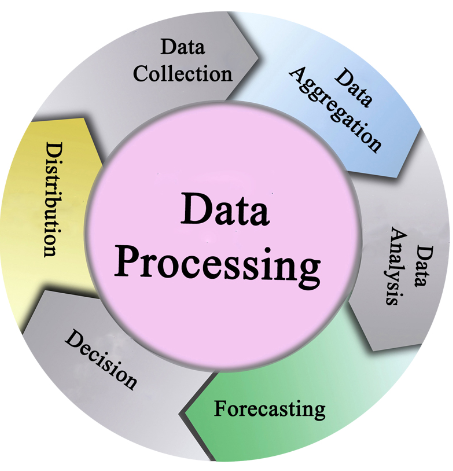 <br>
Types of Bias: Selection bias, confirmation bias, algorithmic bias, and measurement bias.<br>
Impact of Bias: The real-world consequences of biased algorithms, such as unfair hiring practices, biased sentencing in the judicial system, or unequal loan approval rates.<br>
Mitigating Bias: Approaches to identify and mitigate bias, such as diverse data collection, algorithm auditing, and fairness metrics.<br>

4. Privacy and consent in data usage <br>
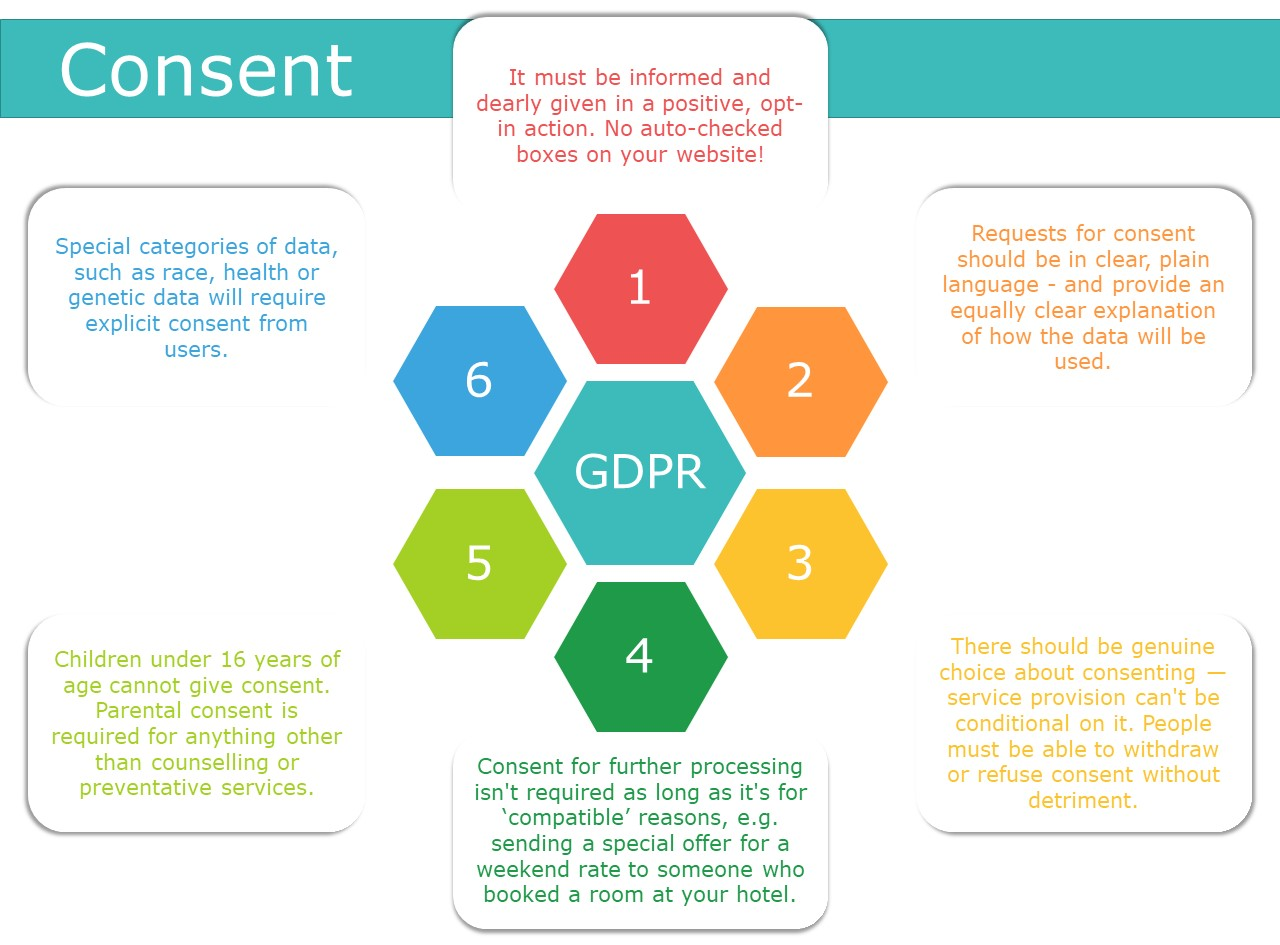<br>
Understanding Personal Data: Define personal, sensitive, and anonymized data. Discuss the ethical considerations for handling each type.<br>
Informed Consent: The importance of obtaining clear, informed consent from users before collecting or using their data.<br>
Data Ownership: Who owns the data? Rights of individuals versus organizations.<br>
Privacy Laws and Regulations: Overview of global privacy laws such as GDPR (General Data Protection Regulation) in Europe, CCPA (California Consumer Privacy Act), HIPAA (Health Insurance Portability and Accountability Act), and their implications for data science projects.<br>

5. Ethical considerations in AI and machine learning <br>
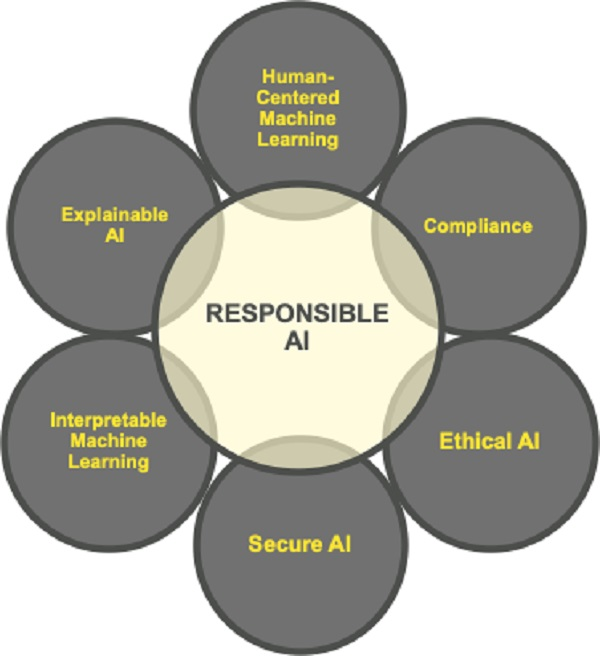<br>
Explainability and Interpretability: Ethical importance of building models that are interpretable and understandable to non-experts.<br>
Autonomous Decision-Making: Challenges with autonomous systems making decisions without human oversight (e.g., self-driving cars, automated hiring).<br>
Ethical AI Frameworks: Overview of existing frameworks, such as AI ethics principles from Google, Microsoft, and other organizations.<br>
Bias in Machine Learning Models: How biased data can lead to biased predictions, and ways to address these challenges.<br>

7. Ethical data science governance and guidelines <br>
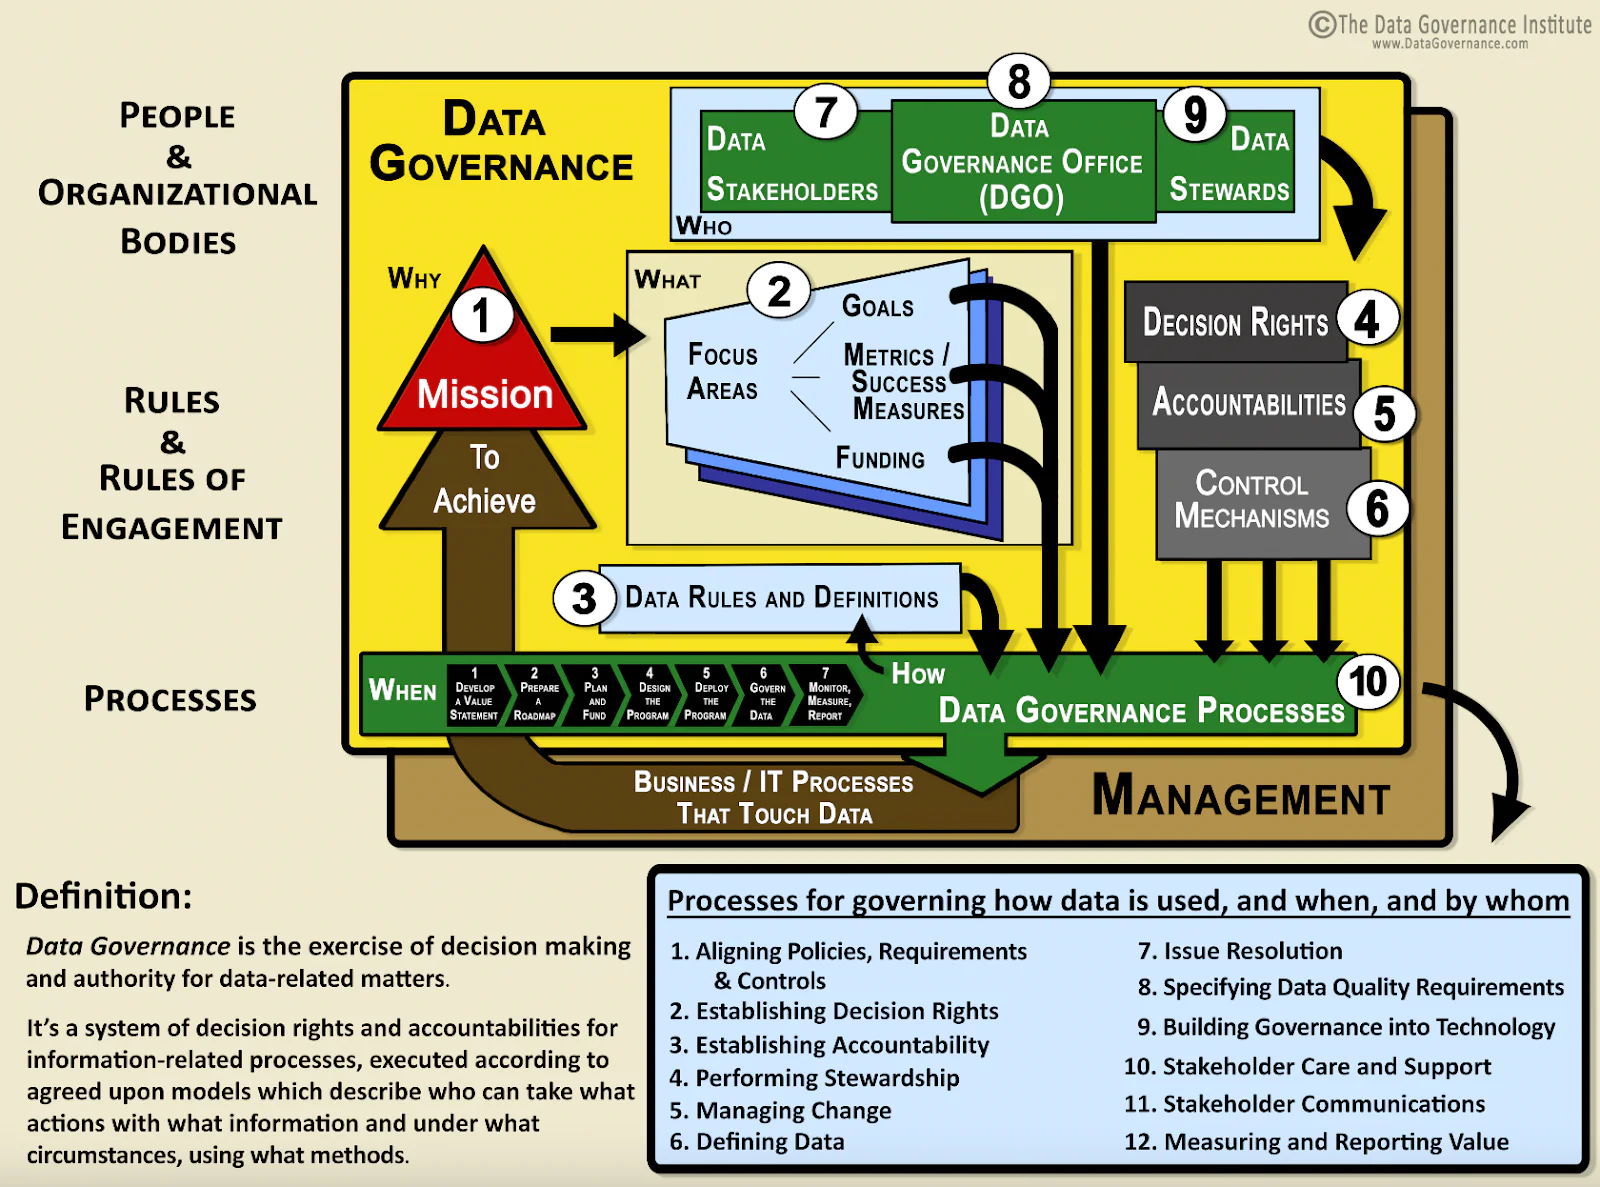<br>
Data Governance Frameworks: Key components of effective data governance, including roles, policies, and standards for ethical data use. <br>
Corporate Social Responsibility (CSR): How organizations can integrate ethical practices into their data science strategies?<br>
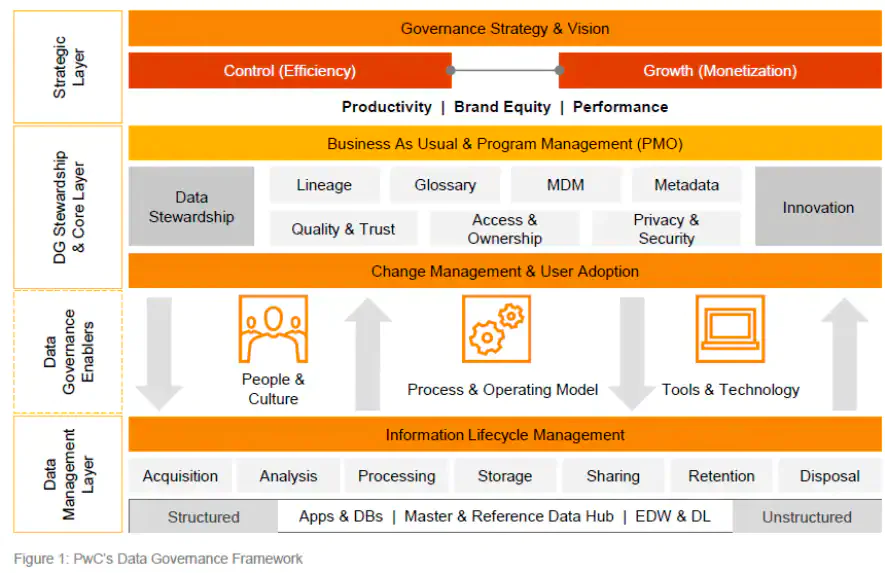<br>

8. Ethical challenges in big data and data-driven decision making <br>
The Role of Big Data: Ethical considerations when working with massive datasets, such as the risk of re-identifying individuals in anonymized datasets.<br>
Decision-Making in Automated Systems: Ethical implications of allowing automated systems to make decisions without human intervention, especially in critical domains like healthcare or finance.<br>
Surveillance and Data Exploitation: The balance between data collection for societal benefits (e.g., public health) and the risk of mass surveillance.<br>

9. Ethics in research and publication<br>
Research Integrity: Ethical standards for publishing data science research, including transparency in methodology, reproducibility, and avoidance of cherry-picking results.<br>
Bias in Peer Review and Publication: Ethical concerns about bias in research publication, the influence of funding sources, and the importance of diversity in research.<br>

10. Tools and techniques for ethical data science<br>
Bias Detection Tools: Introducing tools and techniques to detect and mitigate bias in datasets and algorithms (e.g., IBM AI Fairness 360).<br>
Privacy-Preserving Techniques: Discuss techniques like differential privacy, federated learning, and encryption methods that allow analysis without compromising individual privacy.<br>
Ethical AI Toolkits: Overview of toolkits designed to support ethical AI development (e.g., Google’s What-If Tool).<br>

11. Conclusion and future trends<br>
Emerging Trends: Discuss new challenges on the horizon (e.g., ethics in deepfakes, AI in military applications, and brain-computer interfaces).<br>
Responsibilities of Data Scientists: Reinforce the ethical responsibility that data scientists bear in shaping society through the tools and models they develop.<br>
The Path Forward: Think critically about how you can contribute to ethical practices in your own work.<br>

